In [1]:
import pandas as pd, numpy as np
import logging
import matplotlib.pyplot as plt, seaborn as sns
import warnings;warnings.filterwarnings("ignore")

In [2]:
# setup logging 
log_format = "%(levelname)s %(asctime)s -> %(message)s"
logging.basicConfig(filename='User_summary.log', level=logging.DEBUG, format=log_format)
logger = logging.getLogger()

In [3]:
df = pd.read_csv('transaction_data.csv')
df.head()

,Ac,Date,Transaction,Transaction_amount,Transaction_Type,Balance
0,277917580,2017-01-04,Salary,35379,D,204995
1,277917580,2017-01-09,Fuel,24499,W,180496
2,277917580,2017-01-09,Salary,29118,D,209614
3,277917580,2017-01-14,Other,17333,W,192281
4,277917580,2017-01-22,Rent-payment,35500,W,156781


In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
def plot_chart(usr_df:pd.DataFrame, yr:list='all', mnt:list='all'):
    """
    This functions plots a brief analytical overview of the account.
    PARAMETER:
    -----------------------------------------
    usr_df: it is a dataframe consisting all transactional records of a particual user
    yr: it is year for which the graph should be plotted, it will be only used on graph title
    """
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    msg = f"""Account Summary for {'all years' if yr=='all' else f'year {yr}'} 
    {'' if mnt=='all' else f"and month {mnt}"}"""
    fig.suptitle(msg, fontsize=16, fontweight=0.6, y=0.93, color='black')

    # Graph 1: Pie Chart: Account Deposit history over time
    # ----------------------------------------------
    colors = sns.color_palette('pastel')[0:5]
   
    data_D = usr_df[usr_df.Transaction_Type=='D'].groupby('Transaction')['Transaction_amount'].sum()
    label_D= usr_df[usr_df.Transaction_Type=='D'].groupby('Transaction')['Transaction_amount'].sum().index

    axs[1][0].pie(data_D, labels=label_D, colors = colors, autopct='%.0f%%')
    axs[1][0].set_title('Deposit summary')

    # Graph 2: Pie Chart: Account Withdrawl history over time
    # ----------------------------------------------
    colors = sns.color_palette('pastel')[0:5]
   
    data_W = usr_df[usr_df.Transaction_Type=='W'].groupby('Transaction')['Transaction_amount'].sum()
    label_W= usr_df[usr_df.Transaction_Type=='W'].groupby('Transaction')['Transaction_amount'].sum().index

    axs[1][1].pie(data_W, labels=label_W, colors = colors, autopct='%.0f%%')
    axs[1][1].set_title('Withdrawal summary')
    

    # Graph 3: Line Chart: Account's balance status over time
    # -----------------------------------------------
    sns.lineplot(usr_df.Date, usr_df.Balance, linewidth=2, c='purple', ax=axs[0][0])
    axs[0][0].set_title('Balance summary')

    # if user is filterd data for only one year then 
    # it will plot transactional status month by month
    if yr!='all' and len(yr)==1:
        usr_df.Date = usr_df.Date.dt.month
    else: usr_df.Date = usr_df.Date.dt.year

    # Graph 4: Stacked Bar Chart: Account's Transactional status over time
    # -------------------------------------------------
    usr_df[['Date', 'Transaction_Type', 'Transaction_amount']] \
    .groupby(['Date', 'Transaction_Type']).sum().unstack() \
    .plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[0][1])
    axs[0][1].legend(labels=['Deposit', 'Withdrawal'])
    axs[0][1].set_title('Transaction summary')
    axs[0][1].ticklabel_format(style='plain', axis='y')
    axs[0][1].tick_params(labelrotation=0)

    return fig

def usr_summary(ac:int, df_trnx:pd.DataFrame=df, yr:list='all', mnt:list='all') -> pd.DataFrame:
    """
    DESCRIPTION:
    ----------------------------------------------
    This functions extract all data of specified account holder with specified
    year and month filters, plot account summary and save it 

    PARAMETER:
    ----------------------------------------------
    df_trnx: dataframe consisting all users transactional records

    ac: Account number of user

    yr: Year of which the data to be filtered out
    * {* by default it's value is 0 which means all available year data
       * possible arguments can be any other available year eg 2018, 2019
       * must be passed in list, even it is a single year}

    mnt: Month of which the data to be filtered out 
    * {* by default it's value is 0 which means all available month data
       * possible arguments can be any other available month eg 7, 9
       * must be passed in list, even it is a single month}  

    RETURN:
    -----------------------------------------------
    usr_df: a pandas dataframe consisting all transactional records of
    specified user.
    """
    # adding log 
    logger.info(f"func called: 'usr_summary', args passed: ac {ac}, yr {yr}, mnt {mnt}")

    df_trnx['Date'] = pd.to_datetime(df_trnx['Date']) # convert Date column to datetime type
    temp = df_trnx[df.Ac == ac] # usr data

    all_yr = list(set(temp.Date.dt.year)) # all years in which a user made any transaction
    all_mn = list(set(temp.Date.dt.month)) # all months in which a user made any transaction

    # configuring filters
    yr_ = all_yr if yr=='all' else yr
    mnt_ = all_mn if mnt=='all' else mnt

    # adding log 
    logger.info(f"configured filter: yr {yr_}, mnt_ {mnt_}")

    # filtering user data
    data = temp[(temp.Date.dt.year.isin(yr_)) & (temp.Date.dt.month.isin(mnt_))]

    # plot graph
    fig = plot_chart(data.drop('Ac', axis=1), yr, mnt)
    fig.savefig(f'chart.png')

    # update log
    logger.debug(f"func: usr_summary -> graph saved without any error")


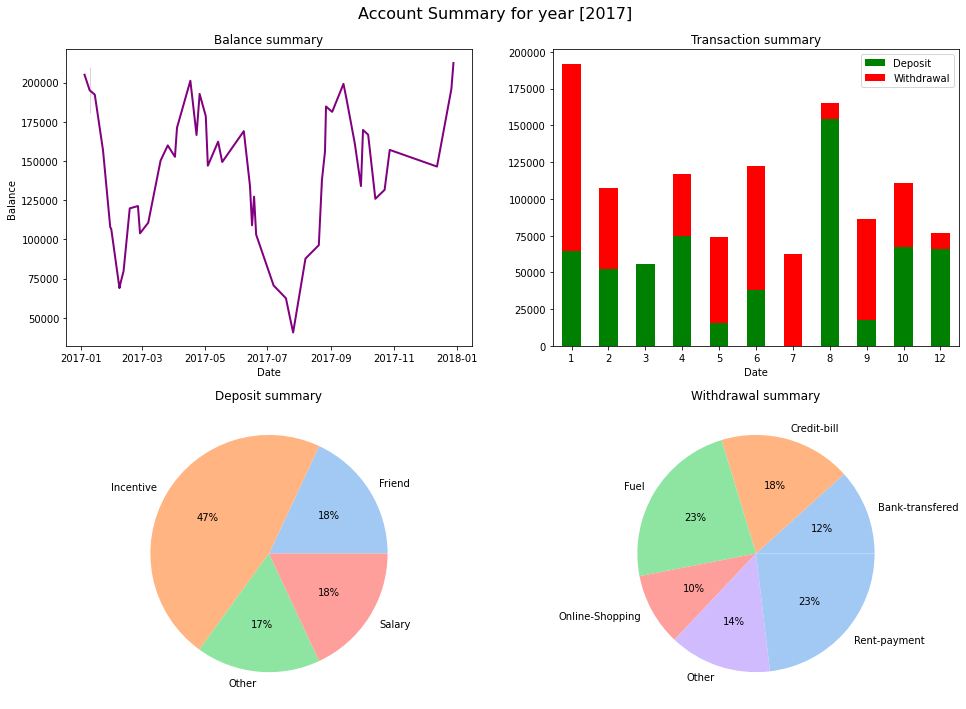

In [6]:
usr_summary(277917580, yr=[2017])